In [1]:
## Visualize relative Frequencies as Box- and Line Plots
## Demonstrate on Ilias’ Viral Infection Object

import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import ma_codes as codes
from ma_codes import mymap, mysize

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

Running Scanpy 1.5.2.dev5+ge5d246aa, on 2020-06-01 14:46.


In [2]:
## Set global plotting parameters
sc.set_figure_params(vector_friendly = True)
plt.rcParams["figure.figsize"] = (6, 5)
sb.set_style("ticks")

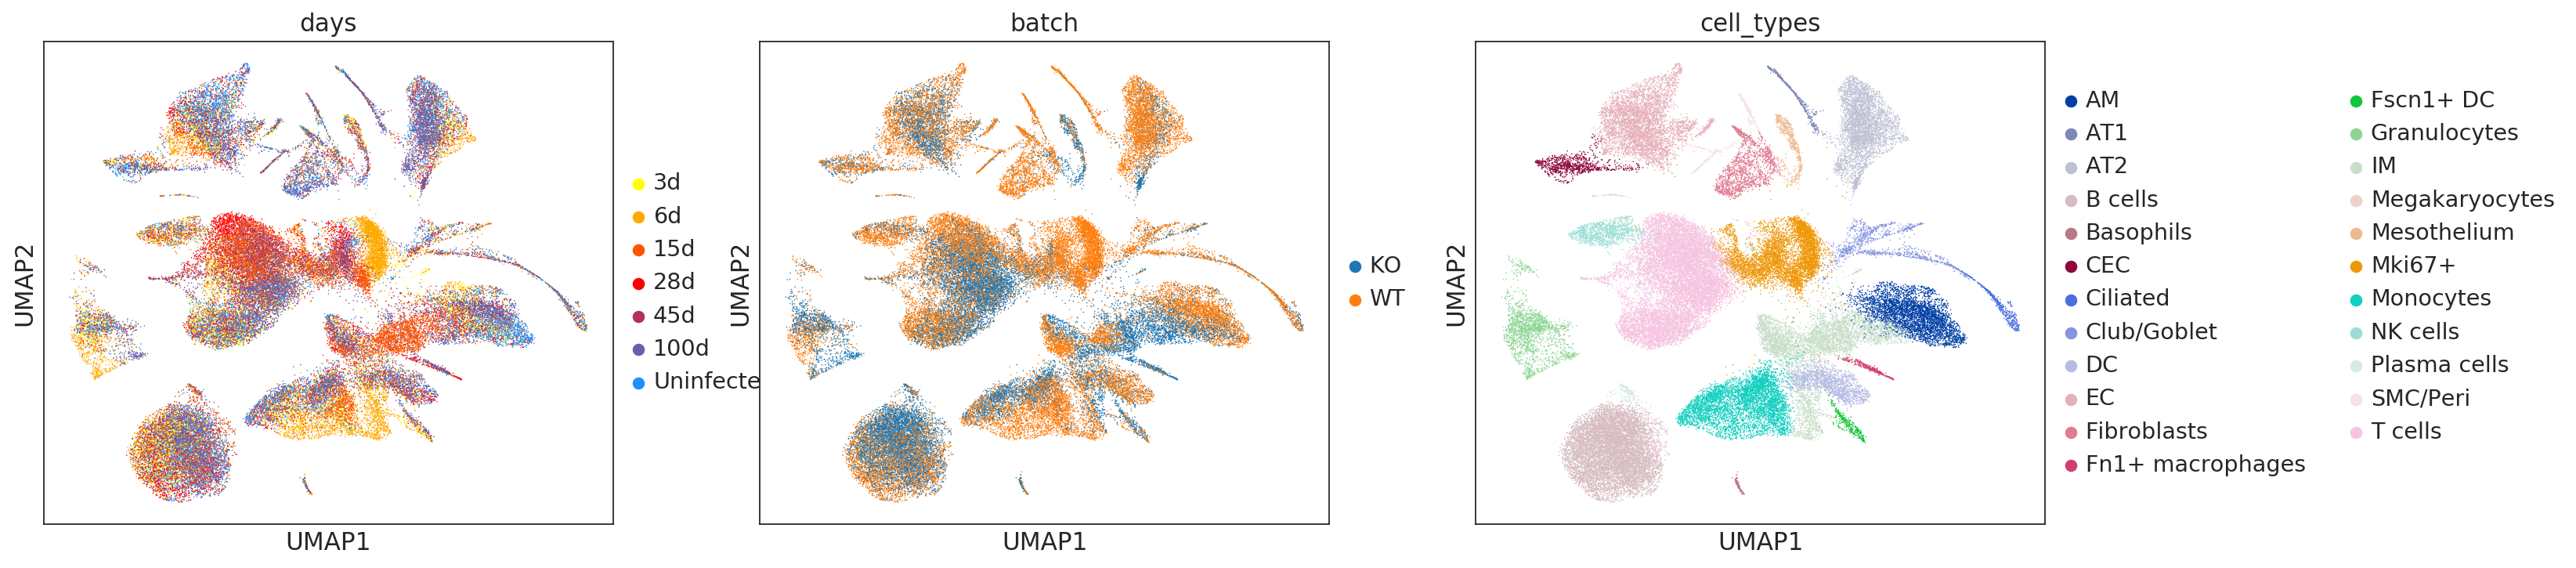

In [7]:
sc.settings.cachedir = "/media/agando/578222DA06535F39/cache/Ilias/"
folder = "/media/agando/578222DA06535F39/Projects/190924-MHV-68_Recreation/"
adata = sc.read(folder + "200404_Recreated_Virus_Object_regressed_loom.h5ad", cache = True)
sc.pl.umap(adata, color = ["days", "batch", "cell_types"])

## 1) Boxplots
### Calculate relative Frequency Table

In [8]:
## This cell has to be run only once
xlabel = "days"                         ## Where time information is stored
cols = adata.uns["%s_colors" %xlabel]
group_by = "cell_types"                 ## Where cluster label is stored, usually "louvain"
condition = None

relFreqs = codes.calc_relFreq(adata, group_by = group_by, xlabel = xlabel, condition = condition)
relFreqs.head(4)

,AM,AT1,AT2,B cells,Basophils,CEC,Ciliated,Club/Goblet,DC,EC,...,IM,Megakaryocytes,Mesothelium,Mki67+,Monocytes,NK cells,Plasma cells,SMC/Peri,T cells,days
muc4160,0.100782,0.030408,0.095569,0.132059,0.001738,0.018245,0.007819,0.024327,0.016507,0.166811,...,0.011295,0.003475,0.007819,0.066030,0.079062,0.023458,0.000869,0.006082,0.132928,Uninfected
muc4161,0.027476,0.004007,0.029765,0.076703,0.003434,0.005152,0.005152,0.017172,0.011448,0.050372,...,0.081282,0.003434,0.004007,0.368632,0.111048,0.030910,0.000000,0.002862,0.115054,6d
muc4162,0.023543,0.003363,0.065583,0.081278,0.002242,0.007287,0.002242,0.016256,0.005605,0.042040,...,0.083520,0.001682,0.000000,0.292040,0.141256,0.032511,0.000000,0.002803,0.117713,6d
muc4163,0.144170,0.030442,0.099943,0.106835,0.002298,0.017806,0.014934,0.036186,0.029868,0.117748,...,0.012636,0.004021,0.009765,0.066054,0.070649,0.024124,0.000000,0.018380,0.140149,Uninfected


### Plot relative Frequency as boxplot for given Cluster

In [11]:
## In case you need to reorder the x axis
adata.obs.loc[:, xlabel].cat.reorder_categories(["Uninfected", '3d', '6d', '15d', '28d', '45d', '100d'], inplace = True)

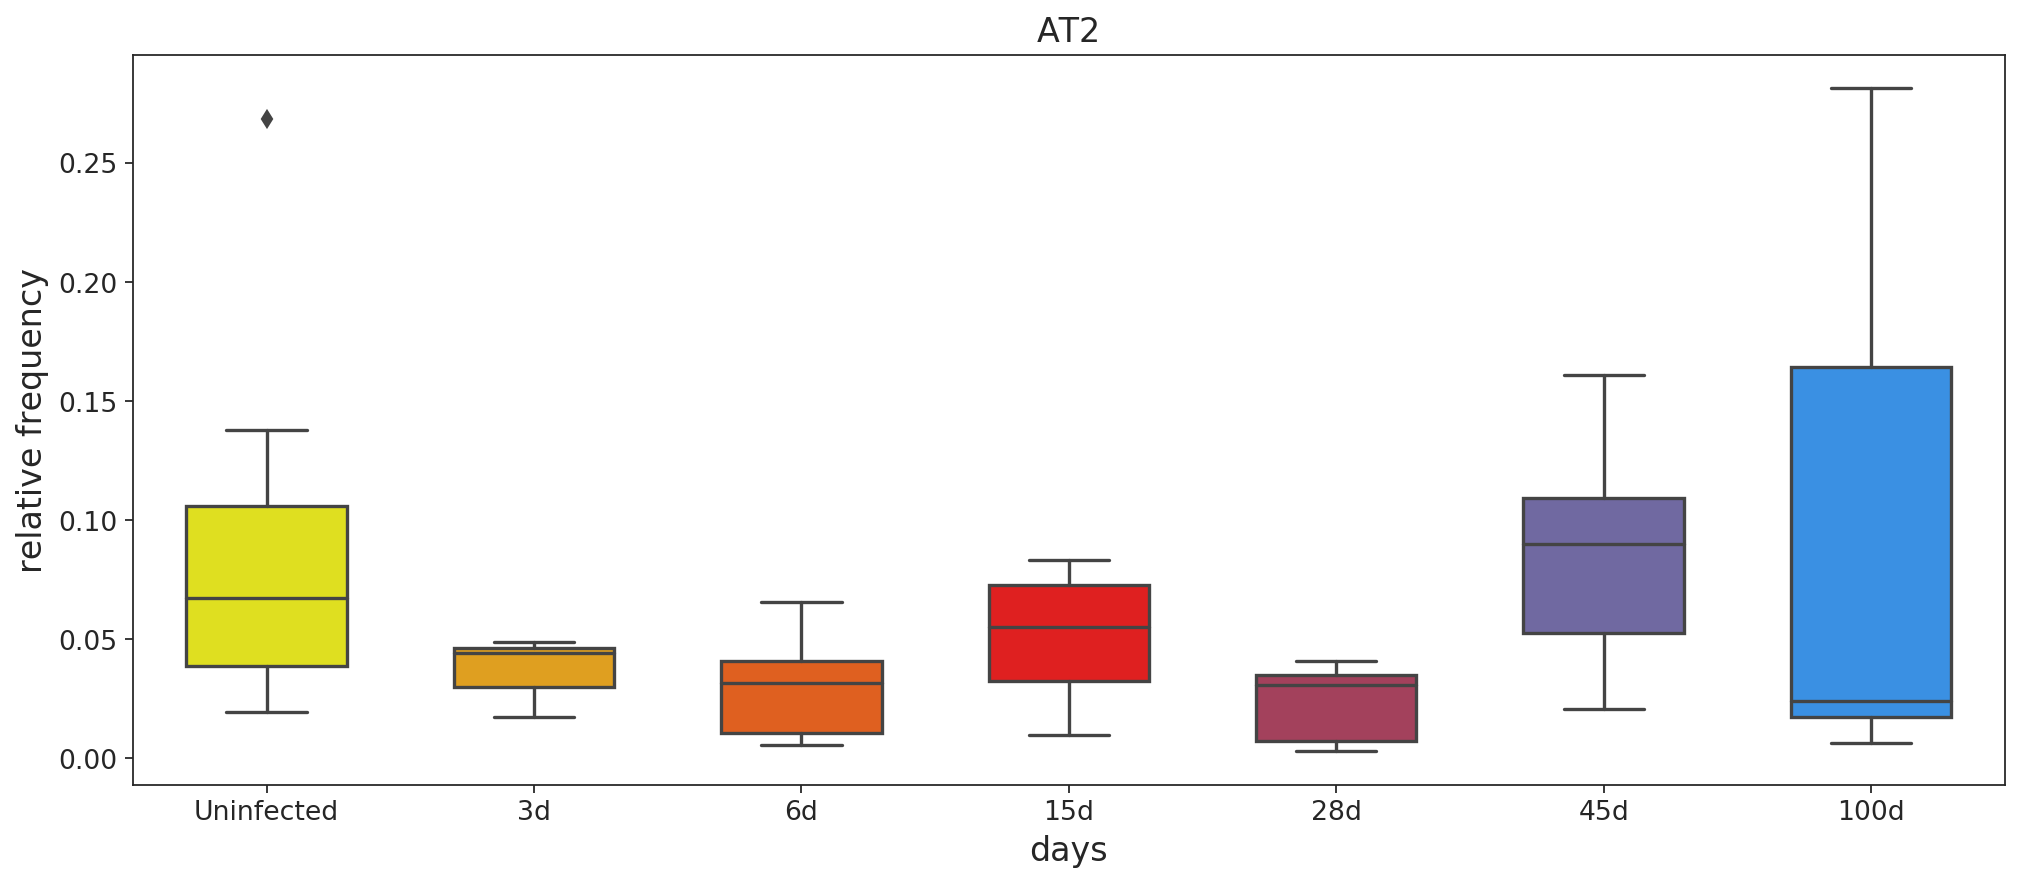

In [12]:
cluster = "AT2"
order = adata.obs[xlabel].cat.categories

## Else, can give order manually by 
# order = ["3d", "6d", ...]

codes.plot_relFreq(relFreqs, cluster = cluster, cols = cols, order = order, xlabel = xlabel, condition = condition,
                   figsize = (15, 6), width = 0.6)

### Relative Frequencies split by condition by specifying Parameter _condition_

In [15]:
## This cell has to be run only once
xlabel = "days"                           ## Where time information is stored
group_by = "cell_types"                   ## Where cluster label is stored, usually "louvain"
condition = "batch"                       ## If you have a label to split by, else None
cols = adata.uns["%s_colors" %condition]  ## an also be given manually e.g. ["red", "gray"]

relFreqs = codes.calc_relFreq(adata, group_by = group_by, xlabel = xlabel, condition = condition)
relFreqs.head(4)

,AM,AT1,AT2,B cells,Basophils,CEC,Ciliated,Club/Goblet,DC,EC,...,Megakaryocytes,Mesothelium,Mki67+,Monocytes,NK cells,Plasma cells,SMC/Peri,T cells,days,batch
muc4160,0.100782,0.030408,0.095569,0.132059,0.001738,0.018245,0.007819,0.024327,0.016507,0.166811,...,0.003475,0.007819,0.066030,0.079062,0.023458,0.000869,0.006082,0.132928,Uninfected,WT
muc4161,0.027476,0.004007,0.029765,0.076703,0.003434,0.005152,0.005152,0.017172,0.011448,0.050372,...,0.003434,0.004007,0.368632,0.111048,0.030910,0.000000,0.002862,0.115054,6d,WT
muc4162,0.023543,0.003363,0.065583,0.081278,0.002242,0.007287,0.002242,0.016256,0.005605,0.042040,...,0.001682,0.000000,0.292040,0.141256,0.032511,0.000000,0.002803,0.117713,6d,WT
muc4163,0.144170,0.030442,0.099943,0.106835,0.002298,0.017806,0.014934,0.036186,0.029868,0.117748,...,0.004021,0.009765,0.066054,0.070649,0.024124,0.000000,0.018380,0.140149,Uninfected,WT


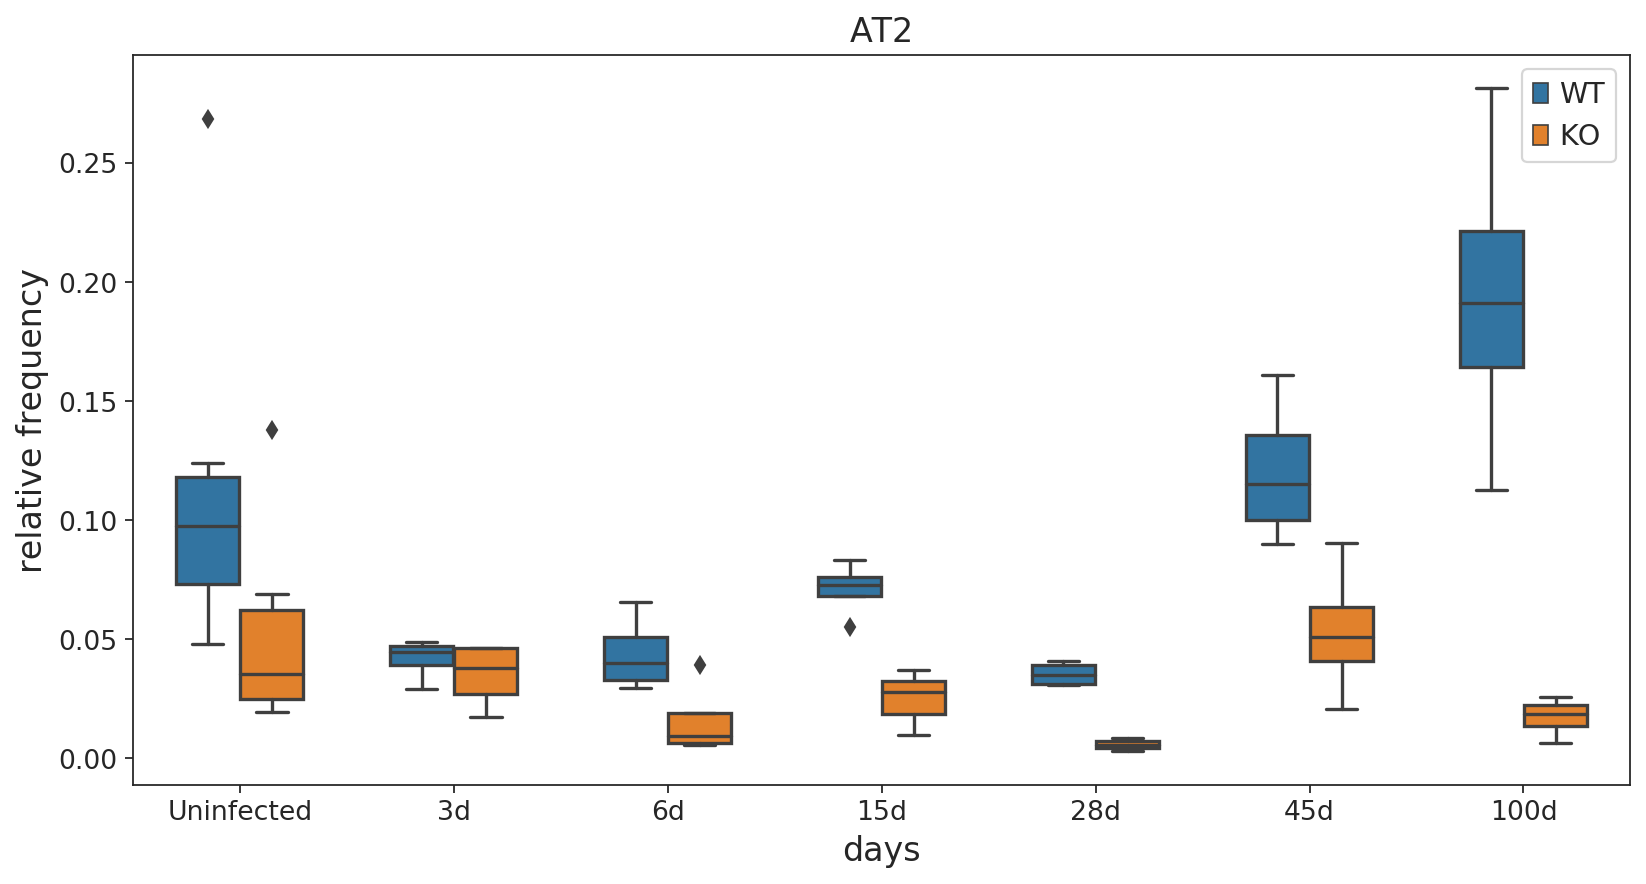

In [17]:
cluster = "AT2"
order = adata.obs[xlabel].cat.categories

codes.plot_relFreq(relFreqs, cluster = cluster, cols = cols, order = order, xlabel = xlabel, condition = condition,
                   figsize = (12, 6), width = 0.6)

## 2) LinePlots
For lineplots, you need a continuous (not categorical) annotation on the x-axis, so we have to introduce a _numeric day_ column manually

In [71]:
xlabel = "days"                            ## in which column the time info is stored
order = adata.obs[xlabel].cat.categories
print(order)
adata.obs["days_numeric"] = [list(order).index(i) for i in adata.obs[xlabel]]

Index(['Uninfected', '3d', '6d', '15d', '28d', '45d', '100d'], dtype='object')


In [ ]:
## If the default ordering is not the way you want to have it plotted on the x Axis
## you can set it manually by

# order = ['Uninfected', '3d', '6d', '15d', '28d', '45d', '100d']
# adata.obs["days"] = [list(order).index(i) for i in adata.obs[xlabel]]

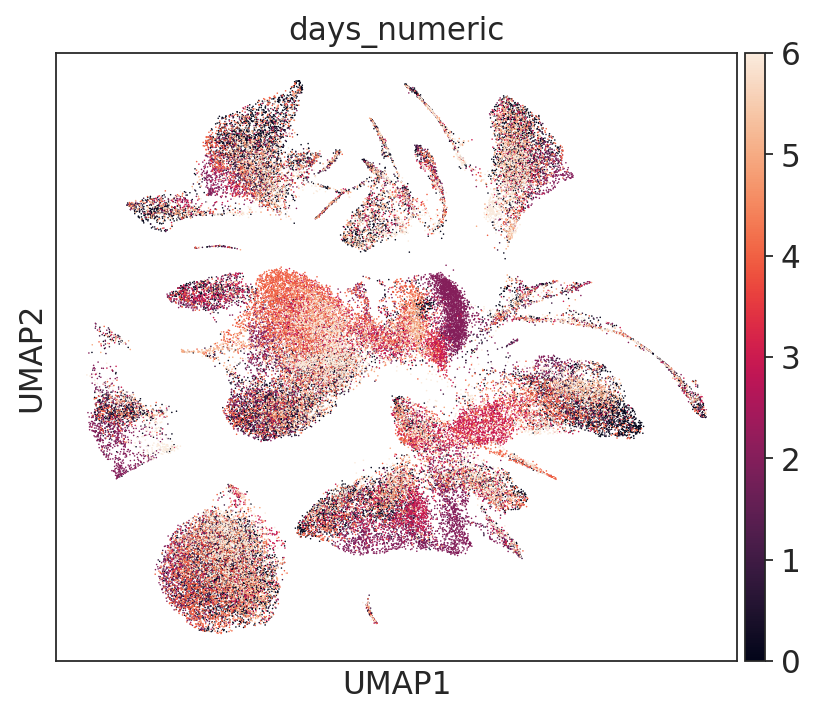

In [72]:
## double-check (the values are only used to set the order on x-axis in the line plot)
sc.pl.umap(adata, color = "days_numeric")

In [73]:
## This cell has to be run only once
xlabel = "days_numeric"                   ## Where time information is stored
group_by = "cell_types"                   ## Where cluster label is stored, usually "louvain"
condition = "batch"                       ## If you have a label to split by, else None
cols = adata.uns["%s_colors" %condition]  ## an also be given manually e.g. ["red", "gray"]
order = ['Uninfected', '3d', '6d', '15d', '28d', '45d', '100d']

relFreqs = codes.calc_relFreq(adata, group_by = group_by, xlabel = xlabel, condition = condition)
relFreqs.head(4)

,AM,AT1,AT2,B cells,Basophils,CEC,Ciliated,Club/Goblet,DC,EC,...,Megakaryocytes,Mesothelium,Mki67+,Monocytes,NK cells,Plasma cells,SMC/Peri,T cells,days_numeric,batch
muc4160,0.100782,0.030408,0.095569,0.132059,0.001738,0.018245,0.007819,0.024327,0.016507,0.166811,...,0.003475,0.007819,0.066030,0.079062,0.023458,0.000869,0.006082,0.132928,0,WT
muc4161,0.027476,0.004007,0.029765,0.076703,0.003434,0.005152,0.005152,0.017172,0.011448,0.050372,...,0.003434,0.004007,0.368632,0.111048,0.030910,0.000000,0.002862,0.115054,2,WT
muc4162,0.023543,0.003363,0.065583,0.081278,0.002242,0.007287,0.002242,0.016256,0.005605,0.042040,...,0.001682,0.000000,0.292040,0.141256,0.032511,0.000000,0.002803,0.117713,2,WT
muc4163,0.144170,0.030442,0.099943,0.106835,0.002298,0.017806,0.014934,0.036186,0.029868,0.117748,...,0.004021,0.009765,0.066054,0.070649,0.024124,0.000000,0.018380,0.140149,0,WT


### smooth

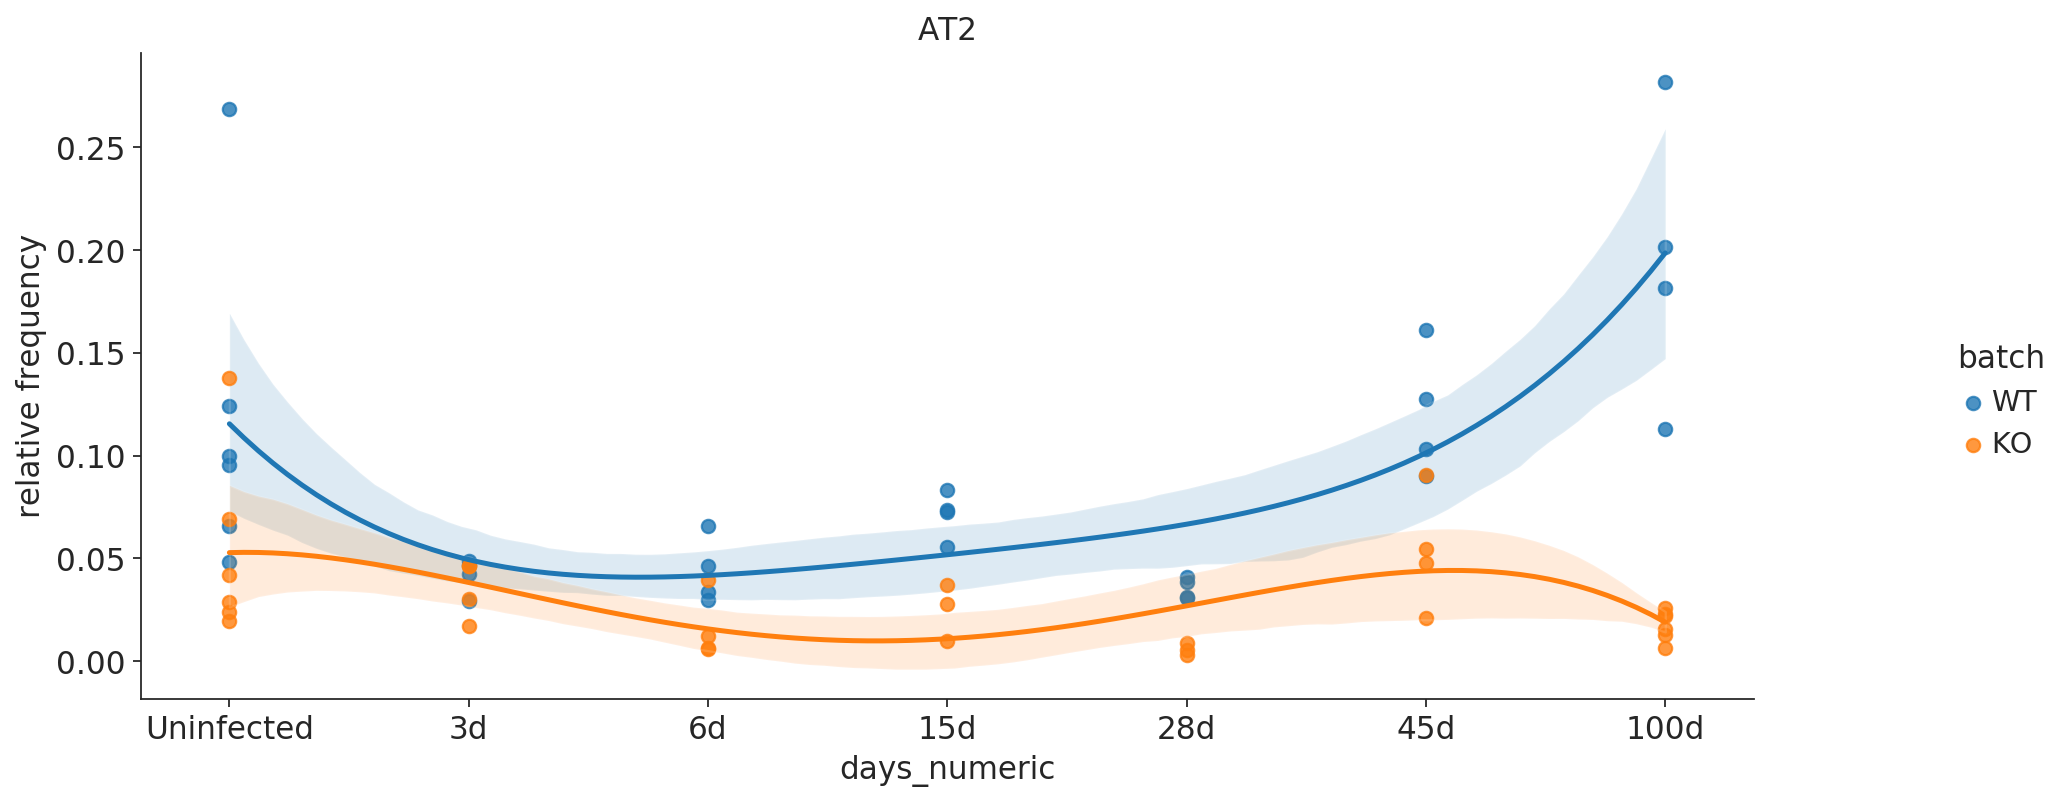

In [74]:
## With replicates as scatter dots, specify scatter = True
cluster = "AT2"
order = adata.obs["days"].cat.categories

codes.plot_rel_frequencies_line(relFreqs, order, cluster = cluster, xlabel = xlabel, condition = condition,
                                scatter = True, smooth = True, conf_int = 90, order_smooth = 4,
                                ylabel = "relative frequency", title = cluster)

### non-smooth

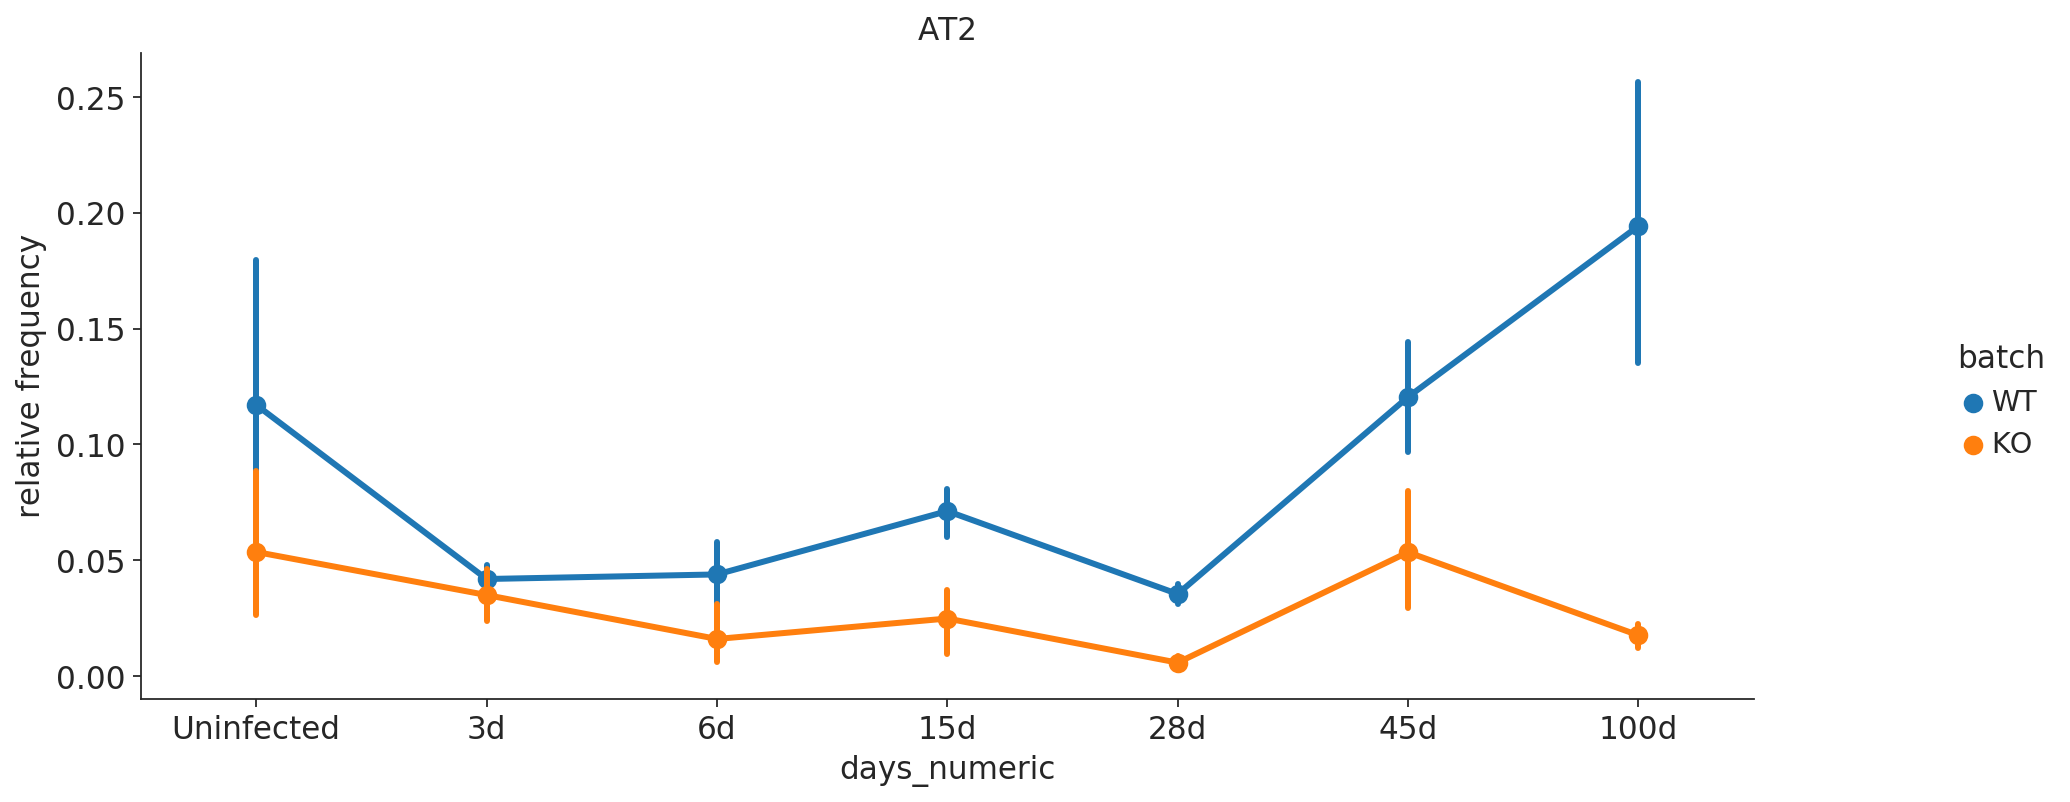

In [75]:
cluster = "AT2"
order = adata.obs["days"].cat.categories

codes.plot_rel_frequencies_line(relFreqs, order, cluster = cluster, xlabel = xlabel,
                                ylabel = "relative frequency", title = cluster, condition = condition)

### Save Plot

Saving figure to /home/agando/Documents/GitHub/Code_Repository/Python/plots/ViralInf_AT2_rel_frequency.pdf


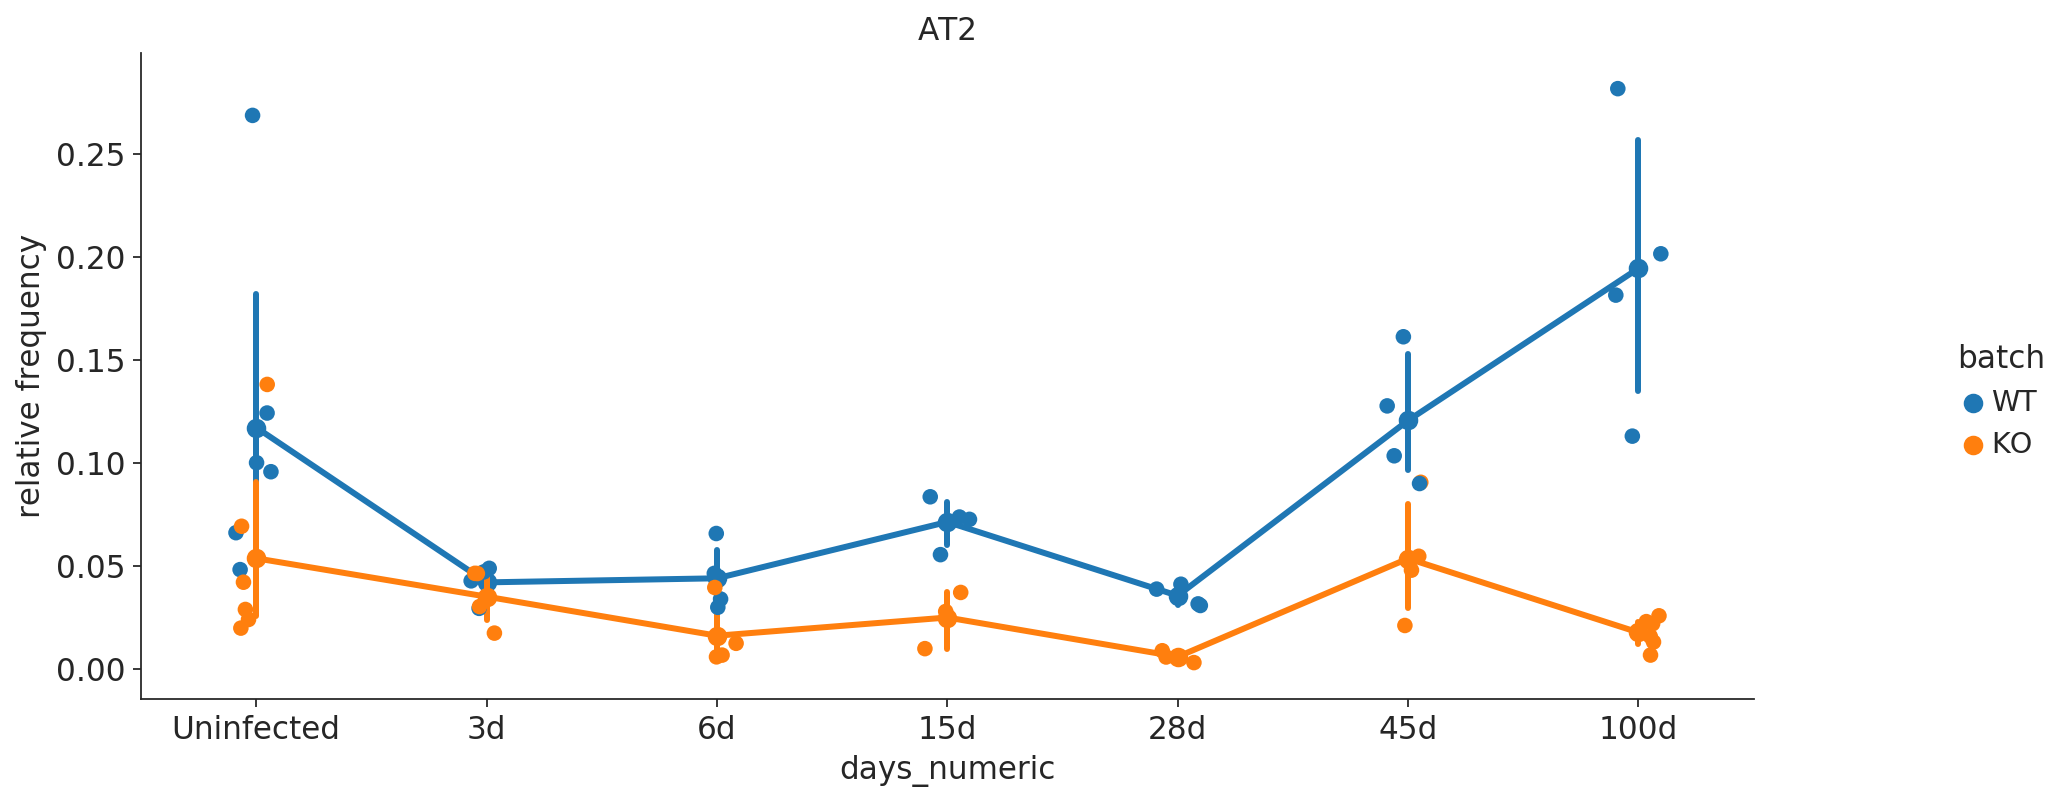

In [68]:
## With replicates as scatter dots, specify scatter = True
cluster = "AT2"
order = adata.obs["days"].cat.categories

## To save plot, specify plot_folder and filename
plot_folder = "/home/agando/Documents/GitHub/Code_Repository/Python/plots/"
codes.plot_rel_frequencies_line(relFreqs, order, cluster = cluster, xlabel = xlabel, scatter = True,
                                ylabel = "relative frequency", title = cluster, condition = condition,
                                save = plot_folder + "ViralInf_AT2_rel_frequency.pdf")